In [1]:
import pandas as pd 
import numpy as np
import scipy as stats
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('2_recoverd_param_lerch_voss_mean_median.csv')

In [3]:
df.insert(3, "v_total = v2 - v1", df['v1_mean']-df['v2_mean'], True)


In [4]:
df.insert(4, "v_bias = v2 + v1", df['v1_mean']+df['v2_mean'], True)


In [5]:
#df.to_csv('with_total_bias_recoverd_param_lerch_voss_mean_median.csv',index=False)


In [6]:
df

,Experiment,v1_mean,v2_mean,v_total = v2 - v1,v_bias = v2 + v1,zr_mean,a_mean,ndt_mean,sndt_mean,alpha_mean,v1_median,v2_median,zr_median,a_median,ndt_median,sndt_median,alpha_median
0,3024_class_words_part_1.dat,3.045761,-1.886244,4.932004,1.159517,0.490160,1.287587,0.498468,0.016445,1.964707,3.042651,-1.885393,0.489585,1.287625,0.498322,0.015441,1.974194
1,1025_class_words_part_2.dat,4.184019,-3.033869,7.217888,1.150151,0.473132,0.992384,0.452771,-0.001727,1.985501,4.189026,-3.034327,0.473779,0.988134,0.452722,-0.001694,1.996919
2,1011_class_pictures_part_1.dat,1.183248,-2.068872,3.252120,-0.885623,0.448963,0.802030,0.672016,0.068462,1.703470,1.155070,-2.054302,0.449528,0.808815,0.672385,0.069677,1.730916
3,017_class_pictures_part_1.dat,2.160075,-3.854435,6.014510,-1.694360,0.540478,1.334036,0.585844,0.006914,2.002214,2.163931,-3.856982,0.541421,1.324728,0.586148,0.006844,2.011112
4,1004_class_pictures_part_1.dat,1.881073,-1.807869,3.688942,0.073205,0.474254,1.435810,0.582226,-0.004146,2.007113,1.884827,-1.802566,0.472489,1.433489,0.581822,-0.003292,2.010884
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,2005_class_pictures_part_1.dat,2.394787,-2.054743,4.449530,0.340045,0.459047,1.476391,0.602516,-0.009770,1.988530,2.384256,-2.050200,0.458715,1.470051,0.603367,-0.008773,1.998020
410,1023_class_pictures_part_1.dat,3.505386,-3.467251,6.972636,0.038135,0.480560,1.472748,0.587795,0.004520,1.914582,3.503307,-3.461909,0.480993,1.425354,0.590417,0.003525,1.937967
411,4012_class_pictures_part_1.dat,2.257025,-1.931329,4.188353,0.325696,0.453542,1.333049,0.496032,-0.005215,1.931201,2.239915,-1.922987,0.453717,1.331196,0.496362,-0.003401,1.942491
412,4012_class_pictures_part_2.dat,2.048675,-3.160632,5.209307,-1.111957,0.555331,1.012809,0.490715,0.020448,1.860695,2.049124,-3.146921,0.556326,1.007626,0.491030,0.020758,1.885833


In [7]:
#consider one task in two session 
df_word_part_1 = df[df['Experiment'].str.contains('class_words_part_1.')]
df_word_part_2 = df[df['Experiment'].str.contains('class_words_part_2.')]
df_word_part_2

,Experiment,v1_mean,v2_mean,v_total = v2 - v1,v_bias = v2 + v1,zr_mean,a_mean,ndt_mean,sndt_mean,alpha_mean,v1_median,v2_median,zr_median,a_median,ndt_median,sndt_median,alpha_median
1,1025_class_words_part_2.dat,4.184019,-3.033869,7.217888,1.150151,0.473132,0.992384,0.452771,-0.001727,1.985501,4.189026,-3.034327,0.473779,0.988134,0.452722,-0.001694,1.996919
5,1018_class_words_part_2.dat,3.576935,-3.617094,7.194029,-0.040159,0.494235,1.091015,0.413563,0.012581,1.916242,3.578139,-3.625846,0.494655,1.076014,0.414428,0.012864,1.930177
9,015_class_words_part_2.dat,3.723706,-1.818238,5.541944,1.905469,0.409064,0.979441,0.482732,0.037284,1.849480,3.712512,-1.821344,0.409240,0.978608,0.482363,0.038508,1.870854
11,3010_class_words_part_2.dat,2.665463,-2.142076,4.807539,0.523386,0.457746,1.222597,0.484142,0.016937,1.809710,2.660714,-2.140095,0.457636,1.213287,0.484923,0.016789,1.821052
16,4003_class_words_part_2.dat,3.087979,-2.027421,5.115400,1.060558,0.418702,1.468389,0.443546,-0.009389,1.995806,3.083261,-2.025875,0.419170,1.464519,0.443688,-0.008929,1.999740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
389,4008_class_words_part_2.dat,2.704903,-2.108766,4.813669,0.596137,0.391954,1.087061,0.464039,-0.000790,1.897946,2.705611,-2.102450,0.391805,1.084543,0.463855,-0.000276,1.914849
392,011_class_words_part_2.dat,3.661090,-3.595598,7.256688,0.065492,0.540831,0.902375,0.432182,0.031549,1.954718,3.647074,-3.598184,0.541639,0.901429,0.432013,0.031934,1.974451
398,1001_class_words_part_2.dat,2.806730,-2.487586,5.294316,0.319145,0.537675,1.161987,0.410170,0.020417,1.881269,2.795527,-2.490619,0.539157,1.158869,0.410039,0.019937,1.898483
403,019_class_words_part_2.dat,2.190970,-1.770592,3.961562,0.420379,0.462969,1.258188,0.401372,0.002194,1.885655,2.196893,-1.759880,0.463021,1.257852,0.401352,0.002250,1.895893


In [8]:
df_word_part_1=df_word_part_1.sort_values('Experiment')

In [9]:
df_word_part_2=df_word_part_2.sort_values('Experiment')

# ttest table

In [10]:
data_1=df_word_part_1
data_2=df_word_part_2
import pingouin as pg

def ttest(data_1,data_2) :
    df = pd.DataFrame([])
    for column in data_1 :
        if column == "Experiment":
            continue
        x1, x2 = data_1[column], data_2[column]
        x1_mean = x1.mean()
        x1_std = x1.std()
        x2_mean = x2.mean()
        x2_std = x2.std()

        res = pg.ttest(x1, x2, paired=True)
        res.insert(loc=0, column='parameter', value=column)
        res.insert(loc=1,column='mean_s1',value=x1_mean)
        res.insert(loc=2,column='std_s1',value=x1_std)
        res.insert(loc=3,column='mean_s2',value=x2_mean)
        res.insert(loc=4,column='std_s2',value=x2_std)

        df = df.append(res)



    df = df.round(4)
    return(df)


In [11]:
resses=ttest(df_word_part_1,df_word_part_2)
#resses.to_excel("ttest_s1s2_word.xlsx")
resses


/tmp/ipykernel_235627/91662214.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(res)
/tmp/ipykernel_235627/91662214.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(res)
/tmp/ipykernel_235627/91662214.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(res)
/tmp/ipykernel_235627/91662214.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(res)
/tmp/ipykernel_235627/91662214.py:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(res)
/tmp/ipykernel_235627/91662214.py:2

,parameter,mean_s1,std_s1,mean_s2,std_s2,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,v1_mean,3.0394,0.5779,3.1086,0.6635,-1.6722,103,two-sided,0.0975,"[-0.15, 0.01]",0.1112,0.417,0.2025
T-test,v2_mean,-2.0844,0.4716,-2.4124,0.6024,7.6793,103,two-sided,0.0000,"[0.24, 0.41]",0.6062,8.759e+08,1.0000
T-test,v_total = v2 - v1,5.1238,0.8779,5.5209,1.0956,-7.2835,103,two-sided,0.0000,"[-0.51, -0.29]",0.4000,1.332e+08,0.9813
T-test,v_bias = v2 + v1,0.9549,0.5848,0.6962,0.6370,4.0423,103,two-sided,0.0001,"[0.13, 0.39]",0.4232,177.665,0.9897
T-test,zr_mean,0.4428,0.0503,0.4767,0.0591,-6.2157,103,two-sided,0.0000,"[-0.04, -0.02]",0.6182,9.972e+05,1.0000
T-test,a_mean,1.1897,0.2791,1.0957,0.2713,5.9796,103,two-sided,0.0000,"[0.06, 0.13]",0.3413,3.538e+05,0.9317
T-test,ndt_mean,0.4605,0.0357,0.4496,0.0406,2.7944,103,two-sided,0.0062,"[0.0, 0.02]",0.2848,4.262,0.8205
T-test,sndt_mean,0.0154,0.0158,0.0174,0.0199,-1.1320,103,two-sided,0.2602,"[-0.01, 0.0]",0.1084,0.202,0.1948
T-test,alpha_mean,1.9146,0.1019,1.8769,0.1367,3.3090,103,two-sided,0.0013,"[0.02, 0.06]",0.3127,17.369,0.8847
T-test,v1_median,3.0359,0.5790,3.1045,0.6652,-1.6512,103,two-sided,0.1018,"[-0.15, 0.01]",0.1100,0.403,0.1991


# Distinct 

In [12]:
list(df_word_part_2)


['Experiment',
 'v1_mean',
 'v2_mean',
 'v_total = v2 - v1',
 'v_bias = v2 + v1',
 'zr_mean',
 'a_mean',
 'ndt_mean',
 'sndt_mean',
 'alpha_mean',
 'v1_median',
 'v2_median',
 'zr_median',
 'a_median',
 'ndt_median',
 'sndt_median',
 'alpha_median']

In [13]:
colum = ['Experiment',
 'v1_mean',
 'v2_mean',
 'v_total = v2 - v1',
 'v_bias = v2 + v1',
 'zr_mean',
 'a_mean',
 'ndt_mean',
 'sndt_mean',
 'alpha_mean']

In [14]:
df_word_part_1_distinct=df_word_part_1.sort_values('Experiment')[colum]
df_word_part_2_distinct=df_word_part_2.sort_values('Experiment')[colum]

In [15]:
import pandas as pd
import scipy.linalg as sp
import numpy as np
def mahalanobis(x=None, data=None, cov=None):
    """Compute the Mahalanobis Distance between each row of x and the data  
    x    : vector or matrix of data with, say, p columns.
    data : ndarray of the distribution from which Mahalanobis distance of each observation of x is to be computed.
    cov  : covariance matrix (p x p) of the distribution. If None, will be computed from data.
    """
    x_minus_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = sp.inv(cov)
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    return mahal.diagonal()

In [16]:
from scipy.stats import pearsonr
from scipy.stats import chi2
chi2.ppf((1-0.001), df=2)
#> 9.21

def calculate_corr(df):
    dfcols = pd.DataFrame(columns=df.columns)
    corr = dfcols.transpose().join(dfcols, how='outer')
    corr_frame = pd.DataFrame()
    ind_all = []
    for r in df.columns:
        corr_frame = pd.DataFrame()

        if r == 'Experiment':
        
            continue

        for c in df.columns:
            if c == r or c == 'Experiment':
                continue
            
            
        
            data = {'Experiment':df['Experiment'],r:np.array(df[r]),c:np.array(df[c])}
           # print(data)
            corr_frame = pd.DataFrame(data)

            df_x = corr_frame[[r, c]]
            df_x['mahala'] = mahalanobis(x=df_x, data=corr_frame[[r, c]])
            df_x['p_value'] = 1 - chi2.cdf(df_x['mahala'], 2)

        # Extreme values with a significance level of 0.01
            df_outliers=df_x.loc[df_x.p_value < 0.001]
            ind=df_outliers.index
            ind_all.append(ind.shape)
        #drop the outliers with index     
            corr_without_outlier = corr_frame.drop(ind)
            x = corr_without_outlier[r]
            y = corr_without_outlier[c]

            


            
            
            corr[r][c] = round(pearsonr(x, y)[0], 4)
    print(ind_all)
    return corr       
            


In [17]:
corr_distinct_1=calculate_corr(df_word_part_1_distinct)
corr_distinct_2=calculate_corr(df_word_part_2_distinct)


/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axi

[(1,), (1,), (1,), (0,), (1,), (0,), (0,), (2,), (1,), (1,), (1,), (1,), (1,), (1,), (1,), (3,), (1,), (1,), (1,), (0,), (0,), (1,), (0,), (3,), (1,), (1,), (1,), (0,), (1,), (0,), (0,), (2,), (0,), (1,), (0,), (0,), (0,), (0,), (0,), (2,), (1,), (1,), (0,), (1,), (0,), (1,), (1,), (3,), (0,), (1,), (1,), (0,), (0,), (1,), (0,), (2,), (0,), (1,), (0,), (0,), (0,), (1,), (0,), (2,), (2,), (3,), (3,), (2,), (2,), (3,), (2,), (2,)]
[(0,), (0,), (0,), (0,), (0,), (0,), (2,), (1,), (0,), (0,), (0,), (1,), (1,), (0,), (2,), (1,), (0,), (0,), (0,), (0,), (1,), (0,), (2,), (1,), (0,), (0,), (0,), (0,), (0,), (0,), (2,), (1,), (0,), (1,), (0,), (0,), (0,), (0,), (2,), (1,), (0,), (1,), (1,), (0,), (0,), (1,), (3,), (2,), (0,), (0,), (0,), (0,), (0,), (1,), (3,), (2,), (2,), (2,), (2,), (2,), (2,), (3,), (3,), (4,), (1,), (1,), (1,), (1,), (1,), (2,), (2,), (4,)]


/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axi

In [18]:
#corr_distinct_1.to_excel("corr_distinct_1_retest_study1_s1_word_class.xlsx")

corr_distinct_1

,Experiment,v1_mean,v2_mean,v_total = v2 - v1,v_bias = v2 + v1,zr_mean,a_mean,ndt_mean,sndt_mean,alpha_mean
Experiment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
v1_mean,NaN,NaN,-0.4093,0.8961,0.7464,-0.4006,-0.1425,0.0099,-0.231,0.2242
v2_mean,NaN,-0.4093,NaN,-0.7718,0.3018,0.0178,0.0603,0.2242,0.2429,-0.014
v_total = v2 - v1,NaN,0.8961,-0.7718,NaN,0.3734,-0.2612,-0.1485,-0.0893,-0.2797,0.1759
v_bias = v2 + v1,NaN,0.7464,0.3018,0.3734,NaN,-0.3995,-0.1094,0.2465,-0.0367,0.2786
zr_mean,NaN,-0.4006,0.0178,-0.2612,-0.3995,NaN,-0.0049,0.0266,0.1767,-0.0514
a_mean,NaN,-0.1425,0.0603,-0.1485,-0.1094,-0.0049,NaN,0.1344,-0.5555,0.5624
ndt_mean,NaN,0.0099,0.2242,-0.0893,0.2465,0.0266,0.1344,NaN,0.2931,0.1713
sndt_mean,NaN,-0.231,0.2429,-0.2797,-0.0367,0.1767,-0.5555,0.2931,NaN,-0.4331
alpha_mean,NaN,0.2242,-0.014,0.1759,0.2786,-0.0514,0.5624,0.1713,-0.4331,NaN


In [19]:
corr_distinct_2.to_excel("corr_distinct_2_retest_study1_s2_word_class.xlsx")

corr_distinct_2

,Experiment,v1_mean,v2_mean,v_total = v2 - v1,v_bias = v2 + v1,zr_mean,a_mean,ndt_mean,sndt_mean,alpha_mean
Experiment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
v1_mean,NaN,NaN,-0.4971,0.8789,0.5715,-0.4117,-0.0567,0.075,-0.1266,0.3077
v2_mean,NaN,-0.4971,NaN,-0.8508,0.4279,-0.1723,0.0167,0.1095,0.1532,-0.0083
v_total = v2 - v1,NaN,0.8789,-0.8508,NaN,0.1108,-0.201,-0.054,-0.0148,-0.1611,0.1913
v_bias = v2 + v1,NaN,0.5715,0.4279,0.1108,NaN,-0.5119,-0.081,0.1816,0.0159,0.3084
zr_mean,NaN,-0.4117,-0.1723,-0.201,-0.5119,NaN,-0.0077,-0.0307,0.1117,-0.077
a_mean,NaN,-0.0567,0.0167,-0.054,-0.081,-0.0077,NaN,0.1569,-0.5007,0.5895
ndt_mean,NaN,0.075,0.1095,-0.0148,0.1816,-0.0307,0.1569,NaN,0.4451,0.2003
sndt_mean,NaN,-0.1266,0.1532,-0.1611,0.0159,0.1117,-0.5007,0.4451,NaN,-0.3343
alpha_mean,NaN,0.3077,-0.0083,0.1913,0.3084,-0.077,0.5895,0.2003,-0.3343,NaN


# lets do reliability 

In [12]:
corr_frame = pd.DataFrame()
data = {'Experiment':df_word_part_1['Experiment'],'v1_mean_part_1':np.array(df_word_part_1['v1_mean']),'v1_mean_part_2':np.array(df_word_part_2['v1_mean'])}
#corr_frame = pd.DataFrame(data,columns=['v1_mean_part_1', 'v1_mean_part_2'])
#corr_frame['v1_mean_part_1']=df_word_part_1['v1_mean']
#data
corr_data = pd.DataFrame(data)

In [12]:
corr_data

,Experiment,v1_mean_part_1,v1_mean_part_2
368,001_class_words_part_1.dat,2.124767,2.022030
108,002_class_words_part_1.dat,2.959980,3.408937
347,003_class_words_part_1.dat,3.808920,3.309615
97,004_class_words_part_1.dat,3.042874,2.300778
62,005_class_words_part_1.dat,3.900866,4.187913
...,...,...,...
393,4009_class_words_part_1.dat,2.114355,2.250387
242,4010_class_words_part_1.dat,2.887806,3.001438
176,4011_class_words_part_1.dat,2.184841,2.158516
341,4012_class_words_part_1.dat,3.050644,2.975088


In [26]:
import pandas as pd
import scipy.linalg as sp
import numpy as np
def mahalanobis(x=None, data=None, cov=None):
    """Compute the Mahalanobis Distance between each row of x and the data  
    x    : vector or matrix of data with, say, p columns.
    data : ndarray of the distribution from which Mahalanobis distance of each observation of x is to be computed.
    cov  : covariance matrix (p x p) of the distribution. If None, will be computed from data.
    """
    x_minus_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = sp.inv(cov)
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    return mahal.diagonal()

In [14]:


df_x = corr_data[['v1_mean_part_1', 'v1_mean_part_2']]
df_x['mahala'] = mahalanobis(x=df_x, data=corr_data[['v1_mean_part_1', 'v1_mean_part_2']])
df_x

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


,v1_mean_part_1,v1_mean_part_2,mahala
368,2.124767,2.022030,2.924039
108,2.959980,3.408937,0.810200
347,3.808920,3.309615,3.128549
97,3.042874,2.300778,3.775475
62,3.900866,4.187913,2.775645
...,...,...,...
393,2.114355,2.250387,2.568409
242,2.887806,3.001438,0.073352
176,2.184841,2.158516,2.388131
341,3.050644,2.975088,0.118659


In [15]:
# Critical values for two degrees of freedom
from scipy.stats import chi2
chi2.ppf((1-0.001), df=2)
#> 9.21

13.815510557964274

In [16]:
df_x['p_value'] = 1 - chi2.cdf(df_x['mahala'], 2)

# Extreme values with a significance level of 0.01
df_without_outlier=df_x.loc[df_x.p_value < 0.001]

In [17]:
df_without_outlier

,v1_mean_part_1,v1_mean_part_2,mahala,p_value


In [18]:
x = df_x['v1_mean_part_1']
y = df_x['v1_mean_part_2']

corr = np.corrcoef(x, y)
corr

array([[1.        , 0.77740653],
       [0.77740653, 1.        ]])

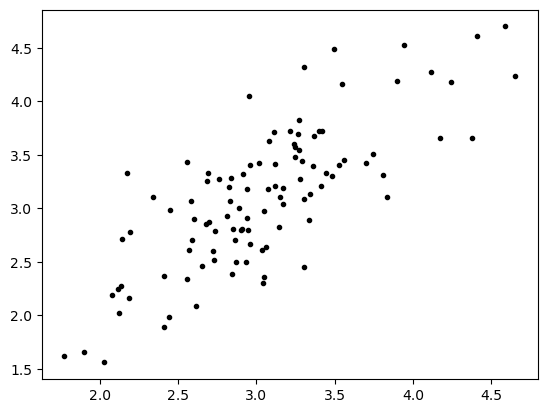

In [19]:
#plt.style.use('_mpl-gallery')

np.random.seed(3)
plt.plot(x, y, '.', color='black');

In [20]:
for column in df_word_part_1:
    print (column)

Experiment
v1_mean
v2_mean
v_total = v2 - v1
v_bias = v2 + v1
zr_mean
a_mean
ndt_mean
sndt_mean
alpha_mean
v1_median
v2_median
zr_median
a_median
ndt_median
sndt_median
alpha_median


/tmp/ipykernel_234957/637901941.py:21: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWa

v1_mean 0.777*** 0.0
Int64Index([], dtype='int64')
v2_mean 0.704*** 0.0
Int64Index([14], dtype='int64')
zr_mean 0.548*** 0.0
Int64Index([177], dtype='int64')


/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axi

a_mean 0.821*** 0.0
Int64Index([397], dtype='int64')
ndt_mean 0.613*** 0.0
Int64Index([397, 12], dtype='int64')
sndt_mean 0.69*** 0.0
Int64Index([256, 397, 356], dtype='int64')


/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


alpha_mean 0.626*** 0.0
Int64Index([12, 101, 186], dtype='int64')
v_total = v2 - v1 0.862*** 0.0
Int64Index([14], dtype='int64')


/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


v_bias = v2 + v1 0.432*** 0.0
Int64Index([], dtype='int64')


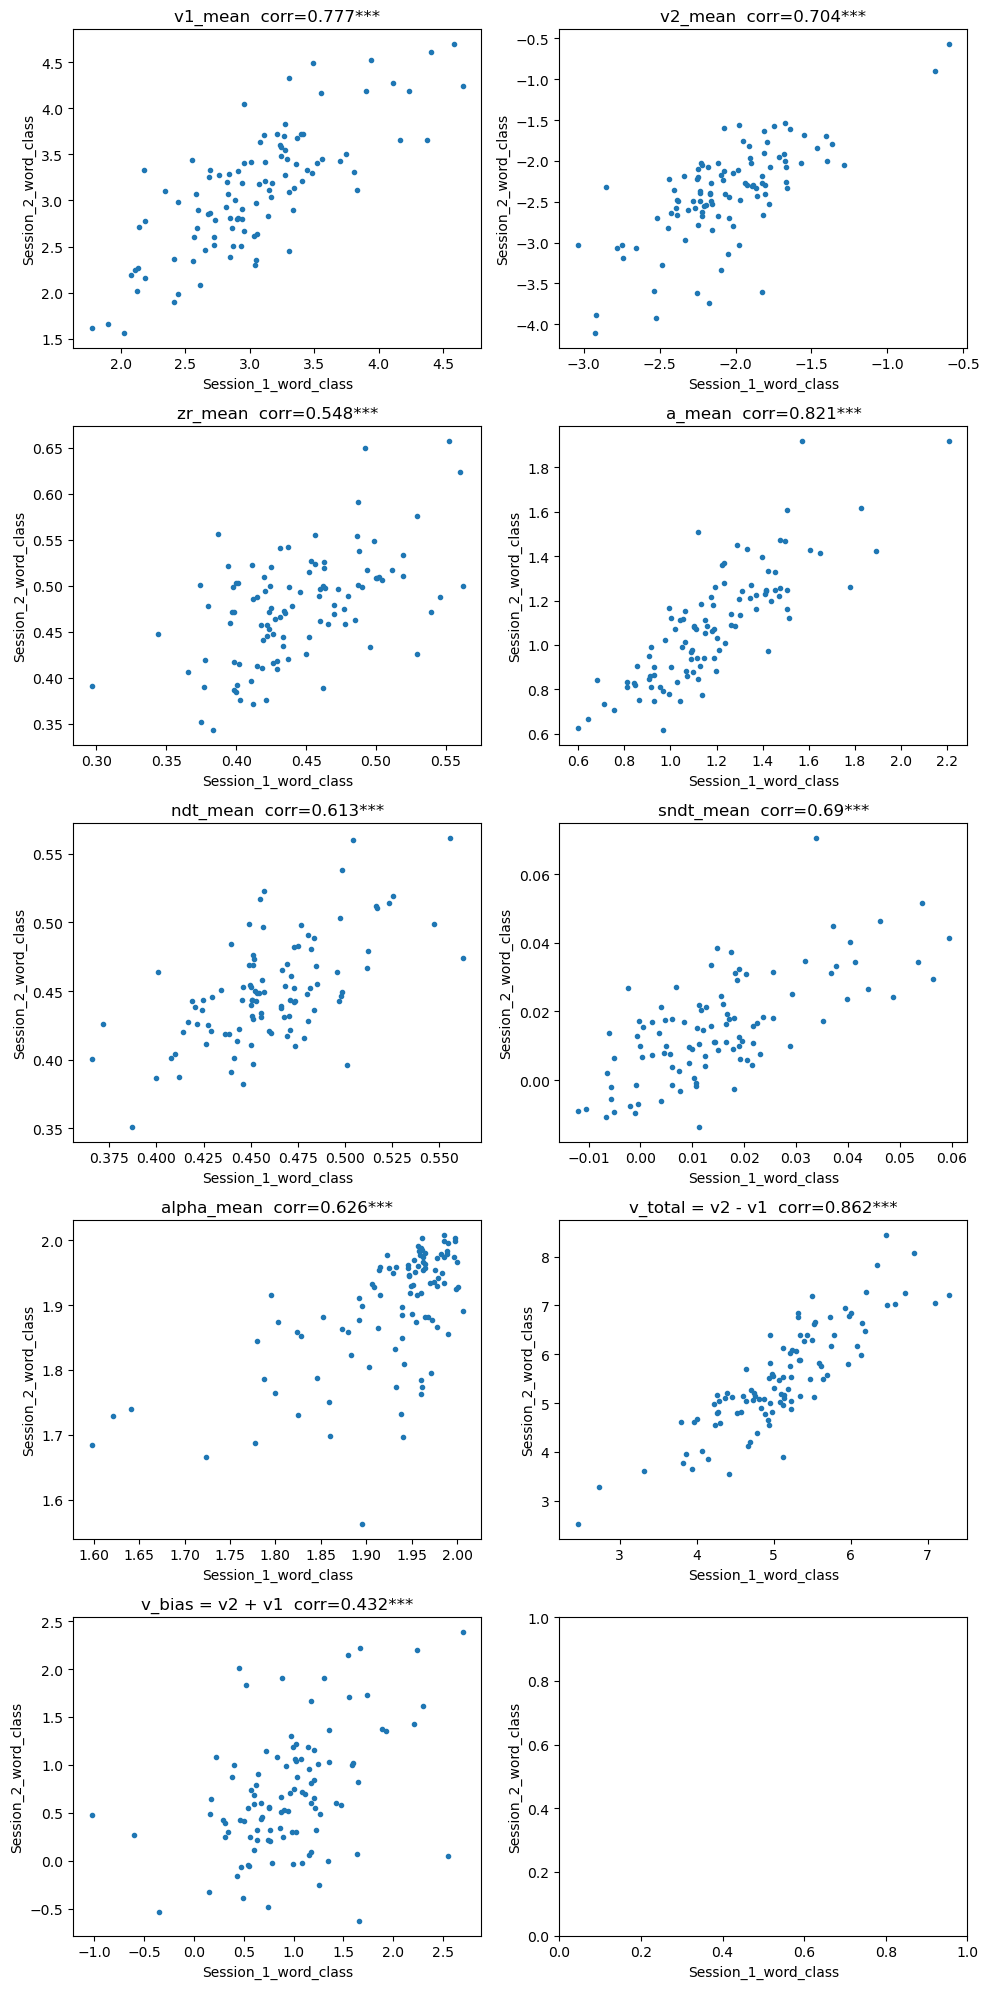

In [29]:
params_mean=['v1_mean','v2_mean','zr_mean','a_mean','ndt_mean','sndt_mean','alpha_mean','v_total = v2 - v1','v_bias = v2 + v1']
#corr_frame = pd.DataFrame()
#corr_frame['Experiment']=df_word_part_1['Experiment']
final_corr_frame = pd.DataFrame()
final_corr_frame['Experiment']=['class_words']
final_corr_frame['corr_type']=['between session']

final_corr_dict = {}
from scipy.stats import chi2
chi2.ppf((1-0.001), df=2)

width=5
height=5
rows = 2
cols = 4
axes=[]
#fig=plt.figure()
a=0
fig, axs = plt.subplots(ncols=2, nrows=5, figsize=(10, 20))
axs = axs.flatten()
from scipy.stats.stats import pearsonr

for param in params_mean:
    corr_frame = pd.DataFrame()
    par_1='param_1_'+str(param)
    par_2='param_2_'+str(param)
    data_analysis = {'Experiment':df_word_part_1['Experiment'],par_1:np.array(df_word_part_1[param]),par_2:np.array(df_word_part_2[param])}
    corr_frame = pd.DataFrame(data_analysis)    
    df_x = corr_frame[[par_1, par_2]]
    df_x['mahala'] = mahalanobis(x=df_x, data=corr_frame[[par_1, par_2]])
    df_x['p_value'] = 1 - chi2.cdf(df_x['mahala'], 2)

# Extreme values with a significance level of 0.01
    df_outliers=df_x.loc[df_x.p_value < 0.001]
    ind=df_outliers.index
#drop the outliers with index     
    corr_without_outlier = corr_frame.drop(ind)
    x = corr_without_outlier[par_1]
    y = corr_without_outlier[par_2]
    #corr =  np.corrcoef(x, y)[0,1]
    #corr =round(corr,3)
    corrcoef_pval =pearsonr(x,y)
    corr = corrcoef_pval[0]
    corr =round(corr,3)
    pvalue=corrcoef_pval[1]
    pvalue =round(pvalue,5)
    #make significance by star ***
    if pvalue < 0.001 :
        corr = str(corr)+'***'
    elif pvalue < 0.01 :
        corr = str(corr)+'**'
    elif pvalue < 0.05 :
        corr = str(corr)+'*'
        
    print(param,corr,pvalue)
    print(ind)
  


    #plt.subplot(2,3)
    #plt.plot(x, y, '.', color='black')
    #axs[a].set_xlabel(param)
    axs[a].plot(x, y,'.')
    axs[a].set_title(param+'  corr='+str(corr))
    axs[a].set_xlabel('Session_1_word_class')
    axs[a].set_ylabel('Session_2_word_class')


    #ax.set_xlabel(param)
    #axs[a].set_xlabel(param)

    a+=1
    #plt.title('corr ='+str(corr))
    plt.xlabel('Session_1_word_class')
    plt.ylabel('Session_2_word_class')
    #plt.savefig("./{}.png".format(param))
    #plt.show()
    #f.savefig("./{}.png".format(param), dpi=600, bbox_inches='tight')
    fig.tight_layout()
    #f.savefig("./{}.png".format(param), dpi=600, bbox_inches='tight')



    
  
    final_corr_frame['corr_'+str(param)] = [corr]
fig.savefig("./RETEST_Study1_word_s1s2_corr_.png", dpi=600, bbox_inches='tight')

#saving the results 

final_corr_frame.to_csv('RETEST_corr_between_session_word_class.csv',index=False)
 
    


/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


v1_mean


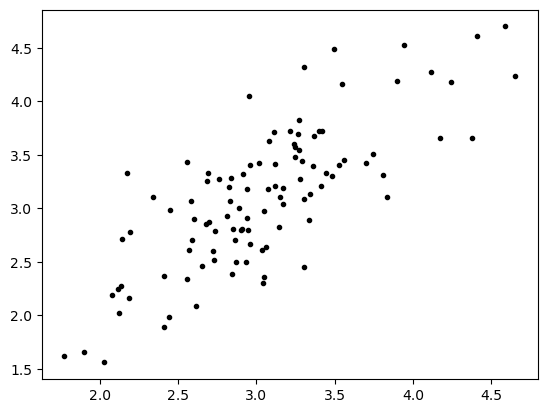

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


v2_mean


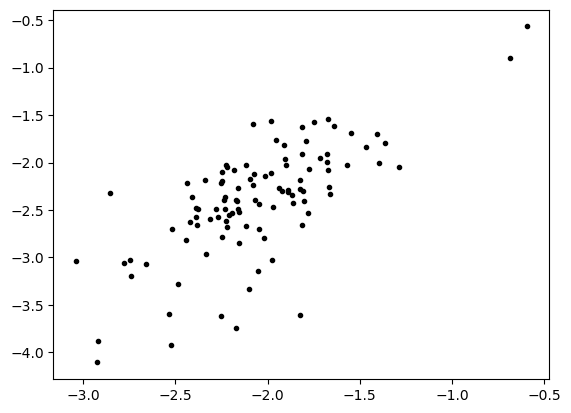

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


zr_mean


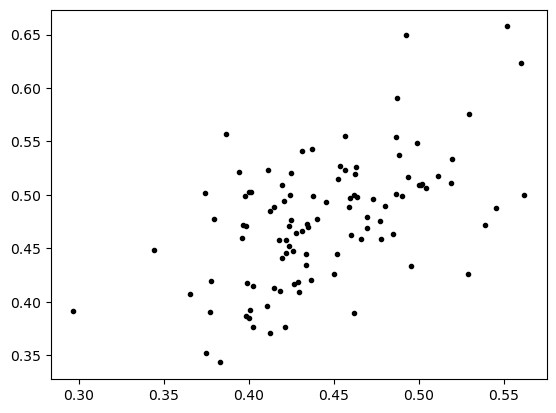

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


a_mean


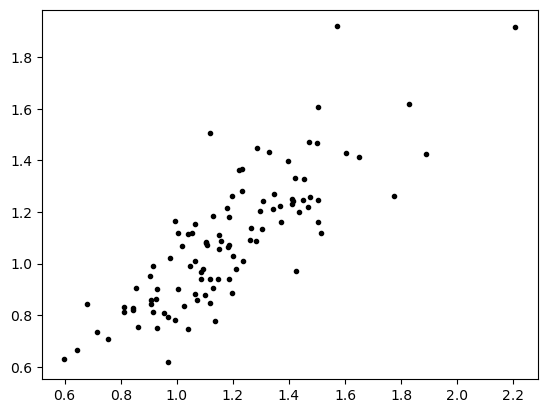

ndt_mean


/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


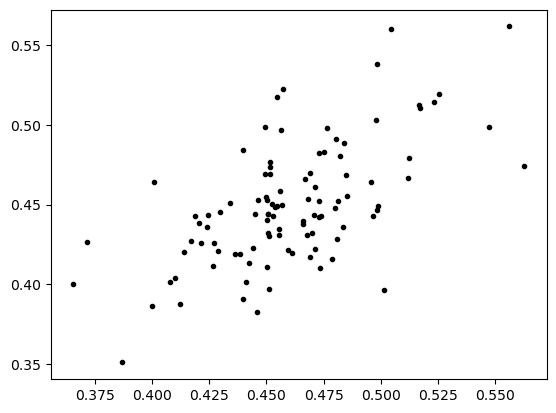

sndt_mean


/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


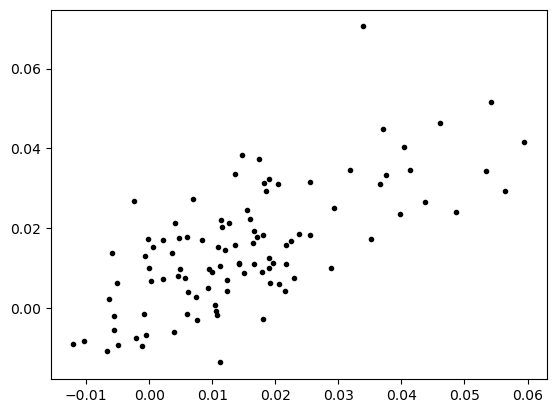

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


alpha_mean


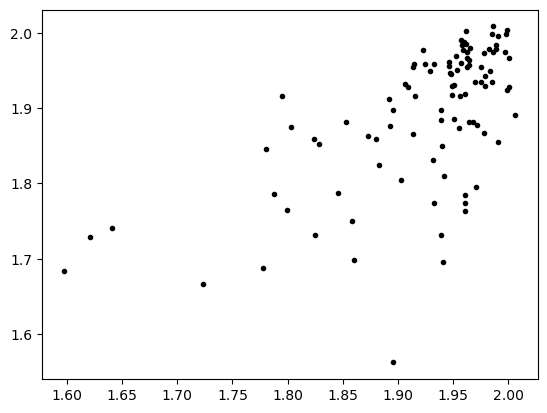

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


v_total = v2 - v1


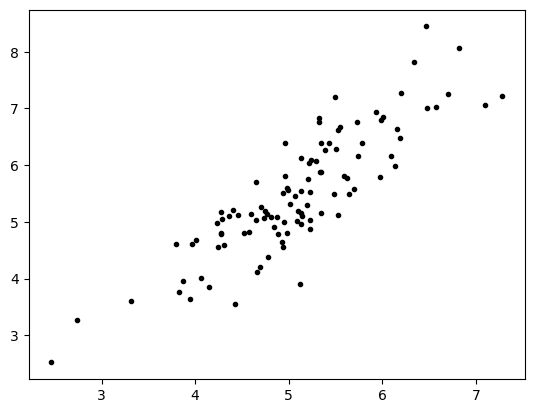

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


v_bias = v2 + v1


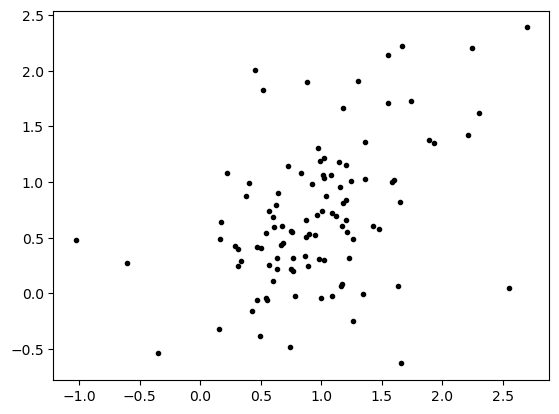

In [21]:
params_mean=['v1_mean','v2_mean','zr_mean','a_mean','ndt_mean','sndt_mean','alpha_mean','v_total = v2 - v1','v_bias = v2 + v1']
#corr_frame = pd.DataFrame()
#corr_frame['Experiment']=df_word_part_1['Experiment']
final_corr_frame = pd.DataFrame()
final_corr_frame['Experiment']=['class_words']
final_corr_frame['corr_type']=['between session']

final_corr_dict = {}
from scipy.stats import chi2
chi2.ppf((1-0.001), df=2)

for param in params_mean:
    corr_frame = pd.DataFrame()
    par_1='param_1_'+str(param)
    par_2='param_2_'+str(param)
    data_analysis = {'Experiment':df_word_part_1['Experiment'],par_1:np.array(df_word_part_1[param]),par_2:np.array(df_word_part_2[param])}
    corr_frame = pd.DataFrame(data_analysis)    
    df_x = corr_frame[[par_1, par_2]]
    df_x['mahala'] = mahalanobis(x=df_x, data=corr_frame[[par_1, par_2]])
    df_x['p_value'] = 1 - chi2.cdf(df_x['mahala'], 2)

# Extreme values with a significance level of 0.01
    df_outliers=df_x.loc[df_x.p_value < 0.001]
    ind=df_outliers.index
#drop the outliers with index     
    corr_without_outlier = corr_frame.drop(ind)
    x = corr_without_outlier[par_1]
    y = corr_without_outlier[par_2]
    corr =  np.corrcoef(x, y)[0,1]
    print(param)
    plt.plot(x, y, '.', color='black')
    plt.show()
    
    final_corr_frame['corr_'+str(param)] = [corr]

#saving the results 

final_corr_frame.to_csv('corr_between_session_word_class.csv',index=False)
 
    


In [22]:
type(corr)

numpy.float64

In [23]:
final_corr_frame

,Experiment,corr_type,corr_v1_mean,corr_v2_mean,corr_zr_mean,corr_a_mean,corr_ndt_mean,corr_sndt_mean,corr_alpha_mean,corr_v_total = v2 - v1,corr_v_bias = v2 + v1
0,class_words,between session,0.777407,0.70416,0.548494,0.821262,0.612913,0.689788,0.625714,0.861721,0.431618


In [24]:
df = pd.read_csv('with_total_bias_recoverd_param_lerch_voss_mean_median.csv')

In [25]:
df

,Experiment,v1_mean,v2_mean,v_total = v2 - v1,v_bias = v2 + v1,zr_mean,a_mean,ndt_mean,sndt_mean,alpha_mean,v1_median,v2_median,zr_median,a_median,ndt_median,sndt_median,alpha_median
0,3024_class_words_part_1.dat,2.775302,-1.843634,4.618935,0.931668,0.488304,1.286637,0.491423,0.020234,1.939520,2.773315,-1.846082,0.488600,1.281603,0.491504,0.019269,1.949172
1,1025_class_words_part_2.dat,3.951487,-3.030869,6.982357,0.920618,0.460097,1.024971,0.444822,-0.005482,1.973413,3.954950,-3.037287,0.458662,1.018384,0.445139,-0.005015,1.982923
2,1011_class_pictures_part_1.dat,1.094287,-2.053254,3.147541,-0.958966,0.453859,0.842740,0.664780,0.071449,1.680715,1.091987,-2.045152,0.454633,0.854842,0.665247,0.072577,1.714519
3,017_class_pictures_part_1.dat,1.991843,-3.771075,5.762918,-1.779232,0.528398,1.331145,0.578720,0.009057,1.953899,1.983995,-3.763898,0.527143,1.319353,0.579576,0.009263,1.964867
4,1004_class_pictures_part_1.dat,1.695352,-1.766107,3.461459,-0.070756,0.480083,1.414699,0.578250,0.005018,1.988156,1.686150,-1.760669,0.480401,1.408314,0.578744,0.006036,1.997333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
409,2005_class_pictures_part_1.dat,2.135326,-2.062411,4.197737,0.072915,0.469826,1.455127,0.596721,-0.002554,1.931114,2.137020,-2.062913,0.469075,1.444680,0.597516,-0.002212,1.940250
410,1023_class_pictures_part_1.dat,3.307016,-3.484820,6.791837,-0.177804,0.474430,1.509676,0.579413,0.004299,1.862007,3.292227,-3.468304,0.473009,1.448166,0.583168,0.004180,1.879247
411,4012_class_pictures_part_1.dat,2.051275,-1.920975,3.972249,0.130300,0.456702,1.345215,0.487066,-0.000880,1.877587,2.047991,-1.912331,0.456495,1.335037,0.487524,0.000836,1.889739
412,4012_class_pictures_part_2.dat,1.925139,-3.061887,4.987026,-1.136749,0.538818,1.016065,0.486288,0.024233,1.820477,1.916742,-3.052243,0.538277,1.013394,0.486856,0.023971,1.850107


# class_pictures

In [18]:
#consider one task in two session 
df_class_pictures_1 = df[df['Experiment'].str.contains('class_pictures_part_1.')]
df_class_pictures_2 = df[df['Experiment'].str.contains('class_pictures_part_2.')]
df_class_pictures_2

,Experiment,v1_mean,v2_mean,v_total = v2 - v1,v_bias = v2 + v1,zr_mean,a_mean,ndt_mean,sndt_mean,alpha_mean,v1_median,v2_median,zr_median,a_median,ndt_median,sndt_median,alpha_median
6,1011_class_pictures_part_2.dat,1.521192,-1.381937,2.903128,0.139255,0.431612,0.813536,0.567737,0.015838,1.852055,1.507616,-1.366583,0.430473,0.820090,0.567440,0.014719,1.886254
7,2001_class_pictures_part_2.dat,2.537672,-3.069423,5.607095,-0.531751,0.423771,1.686591,0.496619,-0.019674,1.971699,2.530272,-3.058482,0.422569,1.668224,0.498256,-0.018804,1.985204
8,1021_class_pictures_part_2.dat,3.893263,-4.381039,8.274302,-0.487776,0.551409,1.512247,0.524401,-0.001437,1.959123,3.892303,-4.421184,0.553390,1.477201,0.526697,-0.001397,1.972604
13,4004_class_pictures_part_2.dat,2.831184,-2.345578,5.176762,0.485605,0.365945,0.852385,0.555158,0.040578,1.889070,2.823187,-2.327886,0.361180,0.849662,0.554321,0.041232,1.922671
19,1020_class_pictures_part_2.dat,3.041624,-2.627500,5.669124,0.414124,0.410516,1.434432,0.539972,-0.010225,1.994102,3.049235,-2.641087,0.409136,1.421854,0.540657,-0.009599,2.003778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396,3003_class_pictures_part_2.dat,2.878718,-2.400901,5.279619,0.477817,0.392220,1.275650,0.484662,0.000293,1.967320,2.880454,-2.411948,0.389823,1.263853,0.484820,0.001645,1.978158
402,011_class_pictures_part_2.dat,3.314563,-3.512272,6.826834,-0.197709,0.487942,1.101947,0.513341,0.002766,1.982045,3.306083,-3.490823,0.487174,1.092838,0.513854,0.003441,1.992730
407,3017_class_pictures_part_2.dat,3.650386,-1.697564,5.347950,1.952822,0.397638,0.934083,0.648869,0.023299,1.977516,3.638426,-1.672621,0.396549,0.934243,0.647847,0.022686,1.992248
412,4012_class_pictures_part_2.dat,2.048675,-3.160632,5.209307,-1.111957,0.555331,1.012809,0.490715,0.020448,1.860695,2.049124,-3.146921,0.556326,1.007626,0.491030,0.020758,1.885833


In [19]:
df_class_pictures_1=df_class_pictures_1.sort_values('Experiment')
df_class_pictures_2=df_class_pictures_2.sort_values('Experiment')
df_class_pictures_2

,Experiment,v1_mean,v2_mean,v_total = v2 - v1,v_bias = v2 + v1,zr_mean,a_mean,ndt_mean,sndt_mean,alpha_mean,v1_median,v2_median,zr_median,a_median,ndt_median,sndt_median,alpha_median
52,001_class_pictures_part_2.dat,3.142965,-1.155845,4.298811,1.987120,0.541056,0.836003,0.526640,0.037634,1.844597,3.118490,-1.152456,0.542538,0.842720,0.527170,0.038633,1.881780
28,002_class_pictures_part_2.dat,2.550106,-1.528082,4.078189,1.022024,0.370768,0.940028,0.608897,0.012094,2.000309,2.548169,-1.522644,0.369747,0.942735,0.609340,0.011567,2.009305
227,003_class_pictures_part_2.dat,2.836046,-1.759374,4.595420,1.076672,0.327667,1.403218,0.536264,0.005293,1.962711,2.823979,-1.740612,0.325283,1.396237,0.535577,0.006277,1.976784
361,004_class_pictures_part_2.dat,2.263182,-1.443034,3.706217,0.820148,0.426124,1.170164,0.578022,0.044191,1.976016,2.253144,-1.425687,0.424946,1.167545,0.576803,0.044140,1.986637
36,005_class_pictures_part_2.dat,2.295909,-3.536124,5.832033,-1.240215,0.447137,1.780244,0.479624,-0.002878,1.949051,2.306979,-3.524496,0.445824,1.757557,0.480516,-0.001501,1.963968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,4009_class_pictures_part_2.dat,2.151345,-2.388264,4.539609,-0.236919,0.407717,1.700291,0.516678,-0.008623,1.936485,2.149346,-2.375274,0.406737,1.687725,0.517545,-0.008064,1.949624
394,4010_class_pictures_part_2.dat,4.171052,-2.920226,7.091278,1.250826,0.451185,1.260304,0.552652,0.003146,1.986420,4.163661,-2.906565,0.448226,1.245047,0.553497,0.003918,1.996532
87,4011_class_pictures_part_2.dat,1.266913,-1.401174,2.668087,-0.134261,0.567240,1.175513,0.526596,0.003651,1.847360,1.271791,-1.398650,0.568779,1.183504,0.527654,0.003405,1.878179
412,4012_class_pictures_part_2.dat,2.048675,-3.160632,5.209307,-1.111957,0.555331,1.012809,0.490715,0.020448,1.860695,2.049124,-3.146921,0.556326,1.007626,0.491030,0.020758,1.885833


# ttest

In [20]:
import pingouin as pg
x1, x2 = df_class_pictures_1['alpha_median'], df_class_pictures_2['alpha_median']
res = pg.ttest(x1, x2, paired=False)
res

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,1.860659,204,two-sided,0.064231,"[-0.0, 0.05]",0.259276,0.763,0.45704


In [21]:
data_1=df_class_pictures_1
data_2=df_class_pictures_2
def ttest(data_1,data_2) :
    df = pd.DataFrame([])
    for column in data_1 :
        if column == "Experiment":
            continue
        x1, x2 = data_1[column], data_2[column]
        x1_mean = x1.mean()
        x1_std = x1.std()
        x2_mean = x2.mean()
        x2_std = x2.std()

        res = pg.ttest(x1, x2, paired=True)
        res.insert(loc=0, column='parameter', value=column)
        res.insert(loc=1,column='mean_s1',value=x1_mean)
        res.insert(loc=2,column='std_s1',value=x1_std)
        res.insert(loc=3,column='mean_s2',value=x2_mean)
        res.insert(loc=4,column='std_s2',value=x2_std)

        df = df.append(res)



    df = df.round(4)
    return(df)

        
    


In [22]:
resses=ttest(df_class_pictures_1,df_class_pictures_2)
resses.to_excel("ttest_s1s2_pic.xlsx")
resses

/tmp/ipykernel_234957/307636976.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(res)
/tmp/ipykernel_234957/307636976.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(res)
/tmp/ipykernel_234957/307636976.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(res)
/tmp/ipykernel_234957/307636976.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(res)
/tmp/ipykernel_234957/307636976.py:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(res)
/tmp/ipykernel_234957/30763697

,parameter,mean_s1,std_s1,mean_s2,std_s2,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,v1_mean,2.1682,0.5902,2.4955,0.8042,-5.2238,102,two-sided,0.0000,"[-0.45, -0.2]",0.4639,1.463e+04,0.9966
T-test,v2_mean,-1.8307,0.8487,-2.3443,1.0168,7.2228,102,two-sided,0.0000,"[0.37, 0.65]",0.5484,9.666e+07,0.9998
T-test,v_total = v2 - v1,3.9990,1.2342,4.8398,1.6285,-8.1943,102,two-sided,0.0000,"[-1.04, -0.64]",0.5820,1.002e+10,0.9999
T-test,v_bias = v2 + v1,0.3375,0.7838,0.1512,0.8422,2.1617,102,two-sided,0.0330,"[0.02, 0.36]",0.2291,1.011,0.6342
T-test,zr_mean,0.4509,0.0679,0.4524,0.0672,-0.1983,102,two-sided,0.8432,"[-0.02, 0.01]",0.0214,0.111,0.0553
T-test,a_mean,1.3741,0.3111,1.2745,0.2860,4.6002,102,two-sided,0.0000,"[0.06, 0.14]",0.3335,1298.149,0.9181
T-test,ndt_mean,0.5821,0.0450,0.5298,0.0479,10.6682,102,two-sided,0.0000,"[0.04, 0.06]",1.1269,2.027e+15,1.0000
T-test,sndt_mean,0.0179,0.0221,0.0105,0.0192,3.6660,102,two-sided,0.0004,"[0.0, 0.01]",0.3593,51.499,0.9508
T-test,alpha_mean,1.9379,0.0595,1.9153,0.1182,1.9622,102,two-sided,0.0525,"[-0.0, 0.05]",0.2419,0.688,0.6813
T-test,v1_median,2.1641,0.5887,2.4918,0.8045,-5.2267,102,two-sided,0.0000,"[-0.45, -0.2]",0.4649,1.48e+04,0.9967


# Distinct Pictuture class

In [44]:
list(df_class_pictures_1)

['Experiment',
 'v1_mean',
 'v2_mean',
 'v_total = v2 - v1',
 'v_bias = v2 + v1',
 'zr_mean',
 'a_mean',
 'ndt_mean',
 'sndt_mean',
 'alpha_mean',
 'v1_median',
 'v2_median',
 'zr_median',
 'a_median',
 'ndt_median',
 'sndt_median',
 'alpha_median']

In [52]:
colum = ['Experiment','v1_mean',
 'v2_mean',
 'v_total = v2 - v1',
 'v_bias = v2 + v1',
 'zr_mean',
 'a_mean',
 'ndt_mean',
 'sndt_mean',
 'alpha_mean']

In [53]:
df_class_pictures_1_distinct=df_class_pictures_1.sort_values('Experiment')[colum]
df_class_pictures_2_distinct=df_class_pictures_2.sort_values('Experiment')[colum]

In [54]:
import pandas as pd
import scipy.linalg as sp
import numpy as np
def mahalanobis(x=None, data=None, cov=None):
    """Compute the Mahalanobis Distance between each row of x and the data  
    x    : vector or matrix of data with, say, p columns.
    data : ndarray of the distribution from which Mahalanobis distance of each observation of x is to be computed.
    cov  : covariance matrix (p x p) of the distribution. If None, will be computed from data.
    """
    x_minus_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = sp.inv(cov)
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    return mahal.diagonal()

In [55]:
from scipy.stats import pearsonr

from scipy.stats import chi2
chi2.ppf((1-0.001), df=2)
#> 9.21

def calculate_corr(df):
    dfcols = pd.DataFrame(columns=df.columns)
    corr = dfcols.transpose().join(dfcols, how='outer')
    corr_frame = pd.DataFrame()
    ind_all = []
    for r in df.columns:
        corr_frame = pd.DataFrame()

        if r == 'Experiment':
        
            continue

        for c in df.columns:
            if c == r or c == 'Experiment':
                continue
            
            
        
            data = {'Experiment':df['Experiment'],r:np.array(df[r]),c:np.array(df[c])}
           # print(data)
            corr_frame = pd.DataFrame(data)

            df_x = corr_frame[[r, c]]
            df_x['mahala'] = mahalanobis(x=df_x, data=corr_frame[[r, c]])
            df_x['p_value'] = 1 - chi2.cdf(df_x['mahala'], 2)

        # Extreme values with a significance level of 0.01
            df_outliers=df_x.loc[df_x.p_value < 0.001]
            ind=df_outliers.index
            ind_all.append(ind.shape)
        #drop the outliers with index     
            corr_without_outlier = corr_frame.drop(ind)
            x = corr_without_outlier[r]
            y = corr_without_outlier[c]

            


            
            
            corr[r][c] = round(pearsonr(x, y)[0], 4)
    print(ind_all)
    return corr       
            


In [56]:
corr_distinct_1=calculate_corr(df_class_pictures_1_distinct)


/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axi

[(1,), (1,), (1,), (0,), (0,), (0,), (1,), (3,), (1,), (1,), (1,), (1,), (1,), (1,), (2,), (3,), (1,), (1,), (1,), (0,), (0,), (0,), (1,), (3,), (1,), (1,), (1,), (0,), (0,), (1,), (1,), (1,), (0,), (1,), (0,), (0,), (0,), (0,), (1,), (1,), (0,), (1,), (0,), (0,), (0,), (0,), (2,), (1,), (0,), (1,), (0,), (1,), (0,), (0,), (1,), (2,), (1,), (2,), (1,), (1,), (1,), (2,), (1,), (3,), (3,), (3,), (3,), (1,), (1,), (1,), (2,), (3,)]


/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axi

In [57]:
corr_distinct_1.to_excel("corr_distinct_1_retest_study1_s1_picture_clase.xlsx")

corr_distinct_1

,Experiment,v1_mean,v2_mean,v_total = v2 - v1,v_bias = v2 + v1,zr_mean,a_mean,ndt_mean,sndt_mean,alpha_mean
Experiment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
v1_mean,NaN,NaN,-0.4418,0.7977,0.3201,-0.2292,0.0437,-0.3271,-0.2522,0.3686
v2_mean,NaN,-0.4418,NaN,-0.8934,0.7085,-0.1128,-0.3949,0.261,0.424,-0.2686
v_total = v2 - v1,NaN,0.7977,-0.8934,NaN,-0.316,-0.0042,0.2923,-0.3779,-0.4077,0.383
v_bias = v2 + v1,NaN,0.3201,0.7085,-0.316,NaN,-0.3385,-0.3944,0.0328,0.2579,-0.0627
zr_mean,NaN,-0.2292,-0.1128,-0.0042,-0.3385,NaN,-0.039,0.0159,0.0848,0.1914
a_mean,NaN,0.0437,-0.3949,0.2923,-0.3944,-0.039,NaN,-0.2352,-0.4746,0.3545
ndt_mean,NaN,-0.3271,0.261,-0.3779,0.0328,0.0159,-0.2352,NaN,0.3979,-0.1274
sndt_mean,NaN,-0.2522,0.424,-0.4077,0.2579,0.0848,-0.4746,0.3979,NaN,-0.4369
alpha_mean,NaN,0.3686,-0.2686,0.383,-0.0627,0.1914,0.3545,-0.1274,-0.4369,NaN


In [59]:
corr_distinct_2=calculate_corr(df_class_pictures_2_distinct[colum])

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axi

[(0,), (0,), (0,), (1,), (0,), (1,), (1,), (1,), (0,), (0,), (0,), (1,), (1,), (1,), (1,), (1,), (0,), (0,), (0,), (1,), (0,), (1,), (1,), (1,), (0,), (0,), (0,), (0,), (0,), (1,), (1,), (1,), (1,), (1,), (1,), (0,), (0,), (1,), (1,), (1,), (0,), (1,), (0,), (0,), (0,), (1,), (2,), (1,), (1,), (1,), (1,), (1,), (1,), (1,), (2,), (1,), (1,), (1,), (1,), (1,), (1,), (2,), (2,), (2,), (1,), (1,), (1,), (1,), (1,), (1,), (1,), (2,)]


/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axi

In [61]:
corr_distinct_2.to_excel("corr_distinct_2_retest_study1_s2_picture_class.xlsx")

corr_distinct_2

,Experiment,v1_mean,v2_mean,v_total = v2 - v1,v_bias = v2 + v1,zr_mean,a_mean,ndt_mean,sndt_mean,alpha_mean
Experiment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
v1_mean,NaN,NaN,-0.5939,0.8647,0.2378,-0.0664,0.1229,-0.1273,-0.2482,0.0936
v2_mean,NaN,-0.5939,NaN,-0.9177,0.6402,-0.2265,-0.3959,0.3287,0.3525,-0.0041
v_total = v2 - v1,NaN,0.8647,-0.9177,NaN,-0.2822,0.1102,0.2892,-0.2686,-0.3437,0.0487
v_bias = v2 + v1,NaN,0.2378,0.6402,-0.2822,NaN,-0.3421,-0.3244,0.2751,0.1925,0.0837
zr_mean,NaN,-0.0664,-0.2265,0.1102,-0.3421,NaN,-0.1591,-0.1552,-0.0014,-0.231
a_mean,NaN,0.1229,-0.3959,0.2892,-0.3244,-0.1591,NaN,-0.2518,-0.5426,0.3918
ndt_mean,NaN,-0.1273,0.3287,-0.2686,0.2751,-0.1552,-0.2518,NaN,0.3941,0.2894
sndt_mean,NaN,-0.2482,0.3525,-0.3437,0.1925,-0.0014,-0.5426,0.3941,NaN,-0.2595
alpha_mean,NaN,0.0936,-0.0041,0.0487,0.0837,-0.231,0.3918,0.2894,-0.2595,NaN


# lets do reliability analysis 

In [31]:
data_analysis = {'Experiment':df_class_pictures_1['Experiment'],'par_1':np.array(df_class_pictures_1['v1_mean']),'par_2':np.array(df_class_pictures_2['v1_mean'])}
data_analysis
corr_frame = pd.DataFrame(data_analysis)
corr_frame

,Experiment,par_1,par_2
171,001_class_pictures_part_1.dat,2.631589,3.142965
400,002_class_pictures_part_1.dat,2.775742,2.550106
355,003_class_pictures_part_1.dat,2.184253,2.836046
86,004_class_pictures_part_1.dat,2.350880,2.263182
401,005_class_pictures_part_1.dat,2.090355,2.295909
...,...,...,...
266,4009_class_pictures_part_1.dat,2.489222,2.151345
269,4010_class_pictures_part_1.dat,2.902879,4.171052
83,4011_class_pictures_part_1.dat,1.080112,1.266913
411,4012_class_pictures_part_1.dat,2.257025,2.048675


In [32]:
df_x = corr_frame[['par_1', 'par_2']]


In [33]:
df_x = corr_frame[['par_1', 'par_2']]
df_x['mahala'] = mahalanobis(x=df_x, data=corr_frame[['par_1', 'par_2']])
df_x['p_value'] = 1 - chi2.cdf(df_x['mahala'], 2)

# Extreme values with a significance level of 0.01
df_outliers=df_x.loc[df_x.p_value < 0.001]
ind=df_outliers.index
print(ind)

Int64Index([258], dtype='int64')


/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


0.6661348356836366


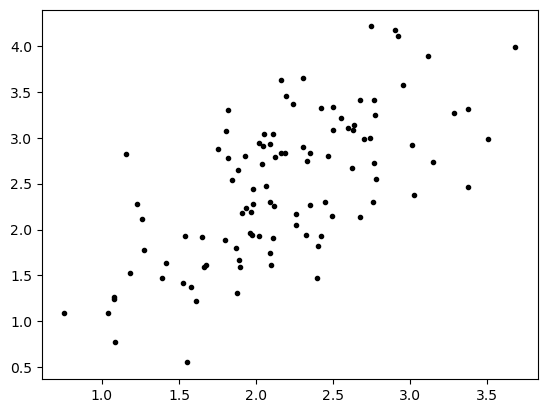

In [35]:
corr_without_outlier = corr_frame.drop(ind)
x = corr_without_outlier['par_1']
y = corr_without_outlier['par_2']
corr =  np.corrcoef(x, y)[0,1]
print(corr)
plt.plot(x, y, '.', color='black')
plt.show()

/tmp/ipykernel_234957/4251368862.py:10: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


v1_mean 0.666*** 0.0
Int64Index([258], dtype='int64')
v2_mean 0.713*** 0.0
Int64Index([359], dtype='int64')
zr_mean 0.435*** 0.0
Int64Index([223], dtype='int64')


/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axi

a_mean 0.732*** 0.0
Int64Index([], dtype='int64')
ndt_mean 0.515*** 0.0
Int64Index([409], dtype='int64')
sndt_mean 0.42*** 1e-05
Int64Index([152, 223], dtype='int64')


/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axi

alpha_mean 0.404*** 3e-05
Int64Index([2, 409, 327], dtype='int64')
v_total = v2 - v1 0.769*** 0.0
Int64Index([], dtype='int64')


/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


v_bias = v2 + v1 0.423*** 1e-05
Int64Index([], dtype='int64')


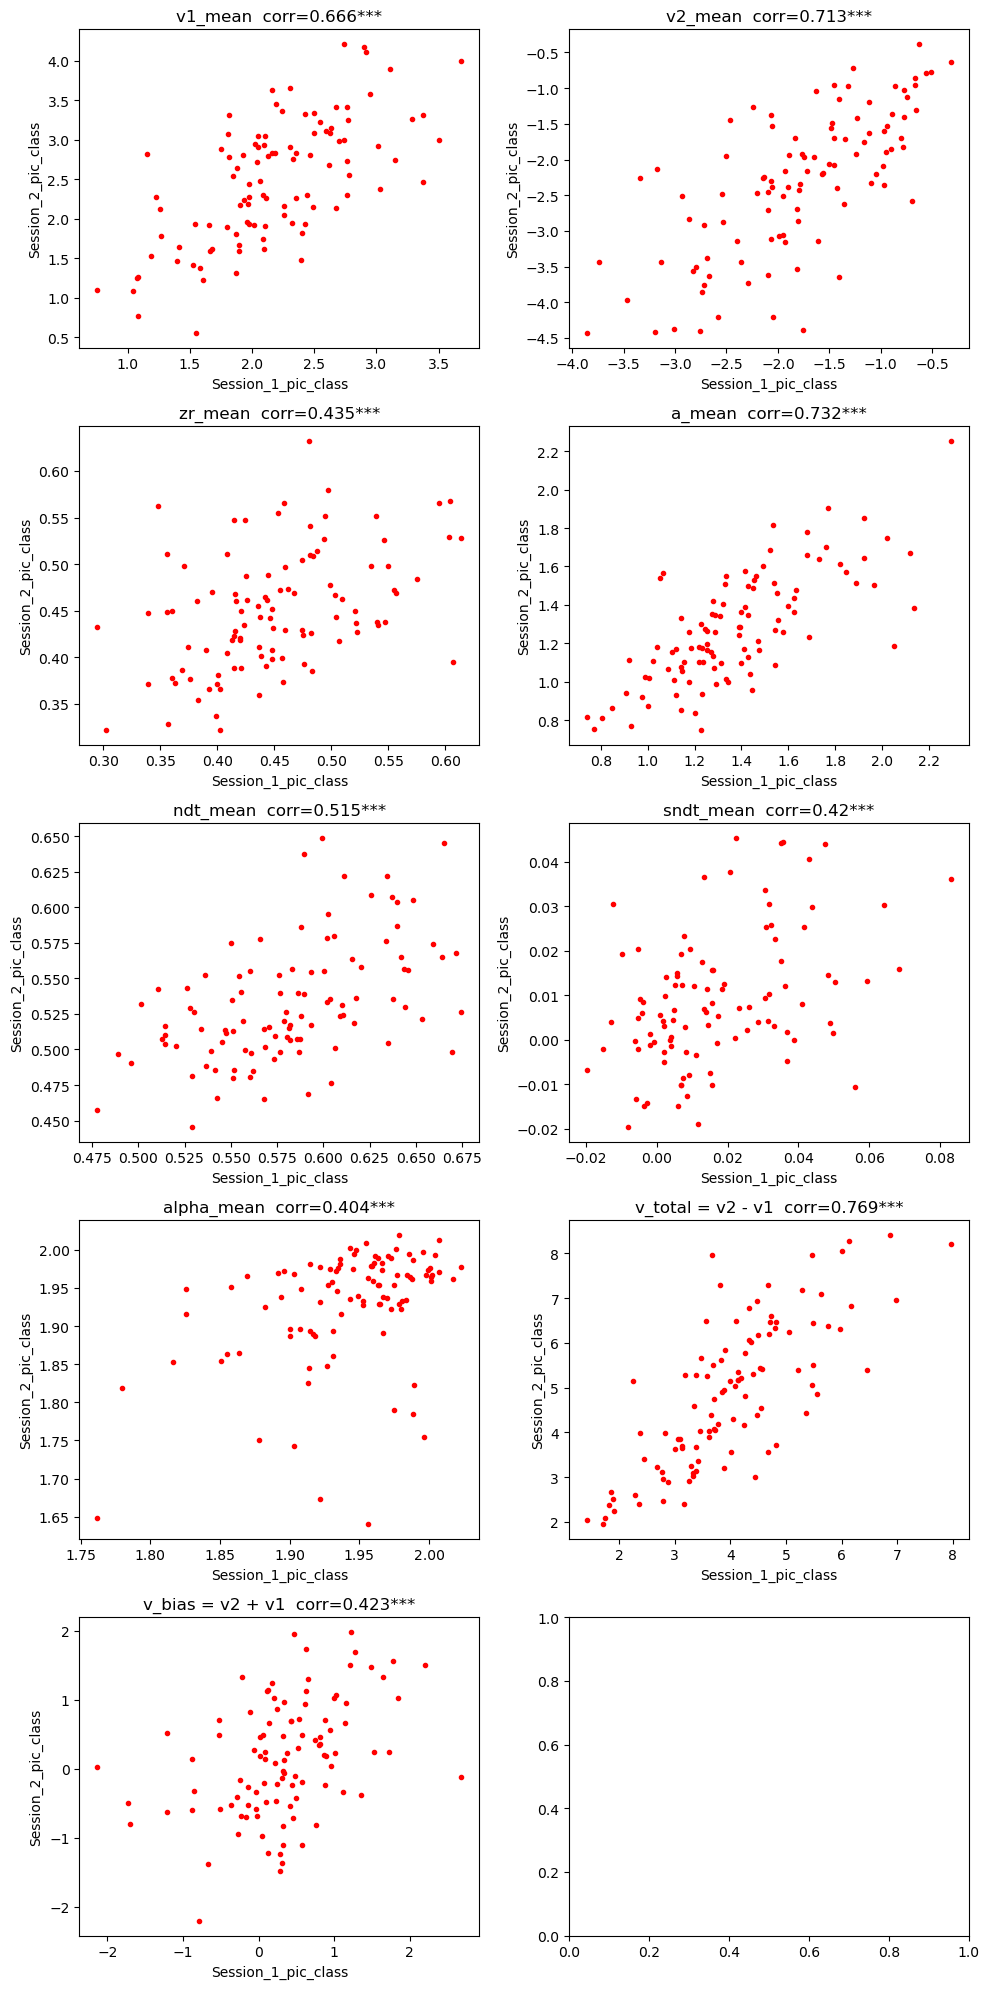

In [28]:
params_mean=['v1_mean','v2_mean','zr_mean','a_mean','ndt_mean','sndt_mean','alpha_mean','v_total = v2 - v1','v_bias = v2 + v1']
#corr_frame = pd.DataFrame()
#corr_frame['Experiment']=df_word_part_1['Experiment']
final_corr_frame = pd.DataFrame()
final_corr_frame['Experiment']=['class_pictures']
final_corr_frame['corr_type']=['between session']

final_corr_dict = {}
from scipy.stats import chi2
from scipy.stats.stats import pearsonr

chi2.ppf((1-0.001), df=2)

fig, axs = plt.subplots(ncols=2, nrows=5, figsize=(10, 20))
axs = axs.flatten()
a=0    
for param in params_mean:
    corr_frame = pd.DataFrame()
    par_1='param_1_'+str(param)
    par_2='param_2_'+str(param)
    data_analysis = {'Experiment':df_class_pictures_1['Experiment'],par_1:np.array(df_class_pictures_1[param]),par_2:np.array(df_class_pictures_2[param])}
    corr_frame = pd.DataFrame(data_analysis)    
    df_x = corr_frame[[par_1, par_2]]
    df_x['mahala'] = mahalanobis(x=df_x, data=corr_frame[[par_1, par_2]])
    df_x['p_value'] = 1 - chi2.cdf(df_x['mahala'], 2)

# Extreme values with a significance level of 0.01
    df_outliers=df_x.loc[df_x.p_value < 0.001]
    ind=df_outliers.index
#drop the outliers with index     
    corr_without_outlier = corr_frame.drop(ind)
    x = corr_without_outlier[par_1]
    y = corr_without_outlier[par_2]
    #corr =  np.corrcoef(x, y)[0,1]
    #corr =round(corr,3)
    corrcoef_pval =pearsonr(x,y)
    corr = corrcoef_pval[0]
    corr =round(corr,3)
    pvalue=corrcoef_pval[1]
    pvalue =round(pvalue,5)
    #make significance by star ***
    if pvalue < 0.001 :
        corr = str(corr)+'***'
    elif pvalue < 0.01 :
        corr = str(corr)+'**'
    elif pvalue < 0.05 :
        corr = str(corr)+'*'
        
    print(param,corr,pvalue)
    print(ind)
  

    #plt.plot(x, y, '.', color='red')
    #plt.show()
    
    axs[a].plot(x, y,'.',color='red')
    axs[a].set_title(param+'  corr='+str(corr))
    axs[a].set_xlabel('Session_1_pic_class')
    axs[a].set_ylabel('Session_2_pic_class')
    
    
    #ax.set_xlabel(param)
    #axs[a].set_xlabel(param)
    
    a+=1
    #plt.title('corr ='+str(corr))
    #plt.xlabel('Session_1_pic_class')
    #plt.ylabel('Session_2_pic_class')
    #plt.savefig("./{}.png".format(param))
    #plt.show()
    #f.savefig("./{}.png".format(param), dpi=600, bbox_inches='tight')
    fig.tight_layout()
    #f.savefig("./{}.png".format(param), dpi=600, bbox_inches='tight')

    final_corr_frame['corr_'+str(param)] = [corr]

#saving the results 
fig.savefig("./ReTest_Study1_Picture_s1s2_corr_.png", dpi=600, bbox_inches='tight')

final_corr_frame.to_csv('RETEST_corr_between_session_class_pictures.csv',index=False)
 
    


Int64Index([258], dtype='int64')
v1_mean


/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


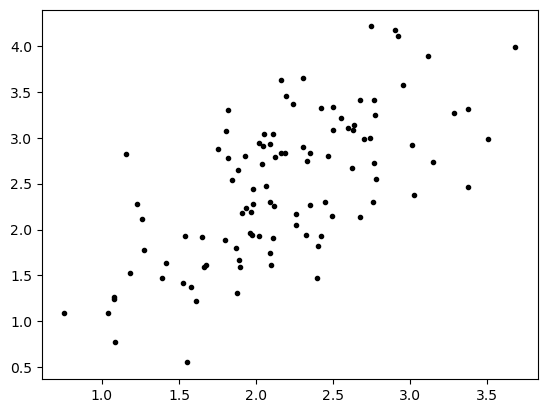

Int64Index([359], dtype='int64')
v2_mean


/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


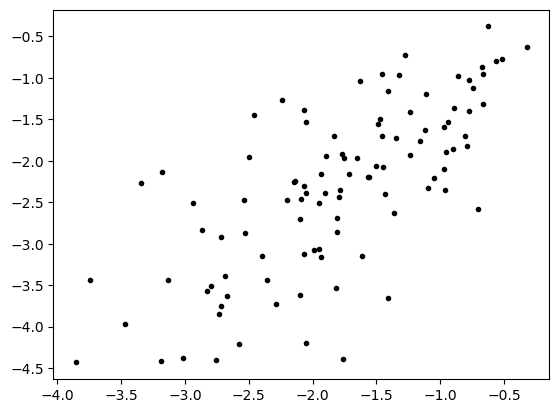

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Int64Index([223], dtype='int64')
zr_mean


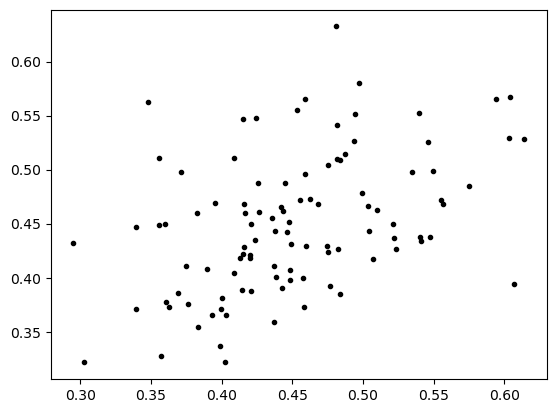

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Int64Index([], dtype='int64')
a_mean


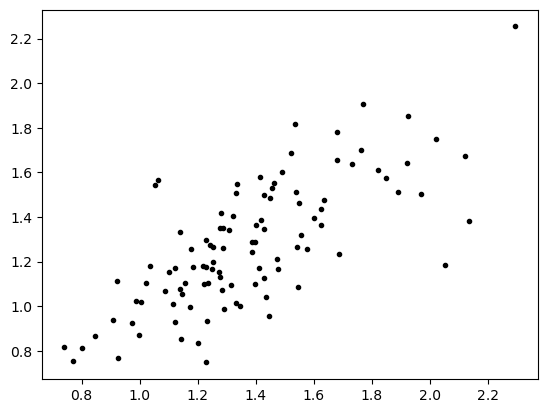

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Int64Index([409], dtype='int64')
ndt_mean


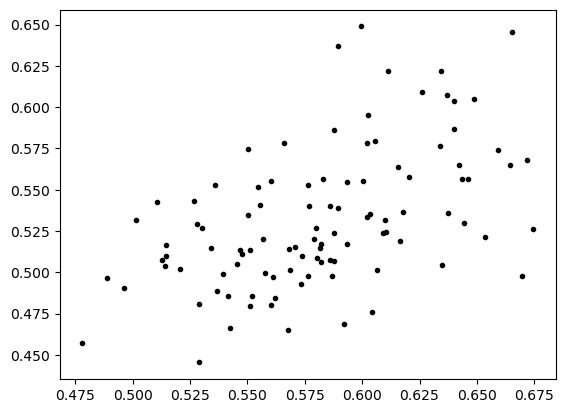

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Int64Index([152, 223], dtype='int64')
sndt_mean


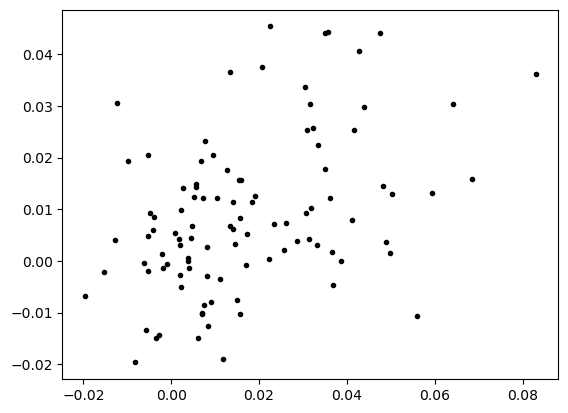

Int64Index([2, 409, 327], dtype='int64')
alpha_mean


/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


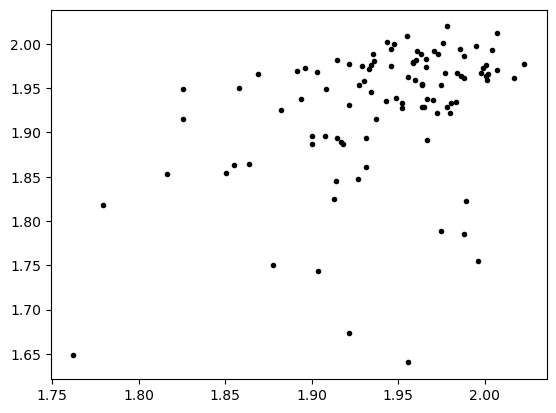

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Int64Index([], dtype='int64')
v_total = v2 - v1


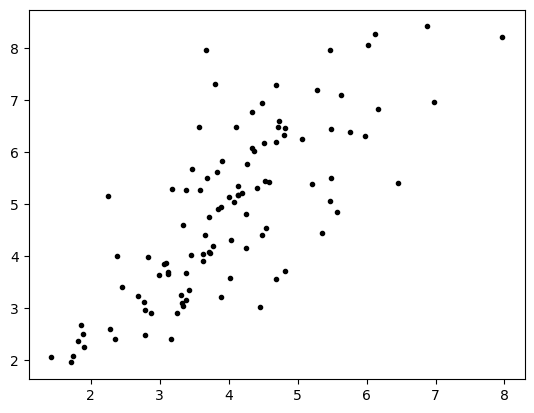

/home/m.ebrahimi/.conda/envs/m_base/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Int64Index([], dtype='int64')
v_bias = v2 + v1


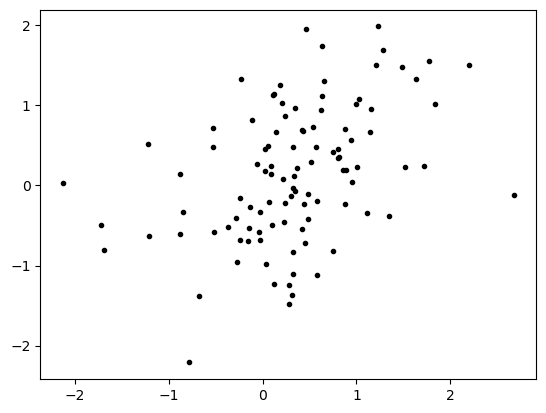

In [36]:
params_mean=['v1_mean','v2_mean','zr_mean','a_mean','ndt_mean','sndt_mean','alpha_mean','v_total = v2 - v1','v_bias = v2 + v1']
#corr_frame = pd.DataFrame()
#corr_frame['Experiment']=df_word_part_1['Experiment']
final_corr_frame = pd.DataFrame()
final_corr_frame['Experiment']=['class_pictures']
final_corr_frame['corr_type']=['between session']

final_corr_dict = {}
from scipy.stats import chi2
chi2.ppf((1-0.001), df=2)

for param in params_mean:
    corr_frame = pd.DataFrame()
    par_1='param_1_'+str(param)
    par_2='param_2_'+str(param)
    data_analysis = {'Experiment':df_class_pictures_1['Experiment'],par_1:np.array(df_class_pictures_1[param]),par_2:np.array(df_class_pictures_2[param])}
    corr_frame = pd.DataFrame(data_analysis)    
    df_x = corr_frame[[par_1, par_2]]
    df_x['mahala'] = mahalanobis(x=df_x, data=corr_frame[[par_1, par_2]])
    df_x['p_value'] = 1 - chi2.cdf(df_x['mahala'], 2)

# Extreme values with a significance level of 0.01
    df_outliers=df_x.loc[df_x.p_value < 0.001]
    ind=df_outliers.index
    print(ind)
#drop the outliers with index     
    corr_without_outlier = corr_frame.drop(ind)
    x = corr_without_outlier[par_1]
    y = corr_without_outlier[par_2]
    corr =  np.corrcoef(x, y)[0,1]
    print(param)
    plt.plot(x, y, '.', color='black')
    plt.show()
    
    final_corr_frame['corr_'+str(param)] = [corr]

#saving the results 

final_corr_frame.to_csv('corr_between_session_class_pictures.csv',index=False)
 
    


In [37]:
final_corr_frame

,Experiment,corr_type,corr_v1_mean,corr_v2_mean,corr_zr_mean,corr_a_mean,corr_ndt_mean,corr_sndt_mean,corr_alpha_mean,corr_v_total = v2 - v1,corr_v_bias = v2 + v1
0,class_pictures,between session,0.666135,0.712565,0.43526,0.731934,0.514505,0.420097,0.403703,0.768859,0.422742
